# **Creación de estados entrelazados**

### **Victor Onofre**

Un estado en el espacio de Hilbert $H$ esta entrelazado o es no-separable si no se puede escribir como un producto tensorial del estado $|\alpha>_{1}$ que pertenece a $H_{1}$ y el estado $|\beta>_{2}$ que pertenece a $H_{2}$. En contraste, si podemos escribir

$$|\psi> = |\alpha>_{1} \otimes |\beta>_{2} $$

el estado $|\psi>$ es separable.

Por ejemplo, el estado $|\psi_{1}>$ esta entrelazado:

$$|\psi_{1}> = \frac{1}{\sqrt{2}}(|00> + |11> )$$

El estado $|\psi_{2}>$ es separable:

$$|\psi_{2}> =  \frac{1}{\sqrt{2}}(|01> + |11> ) = \frac{1}{\sqrt{2}}(|0> + |1> ) \otimes |1>  $$

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib

In [2]:
backend_statevector = BasicAer.get_backend('statevector_simulator')# Este backend ejecuta el circuito cuántico y devuelve el vector de estado cuántico de la simulación. 
style = {'backgroundcolor': 'lightyellow'} # Estilo del circuito 

In [3]:
backend_qasm = BasicAer.get_backend('qasm_simulator')# Este backend está diseñado para imitar un dispositivo (computadora cuantica) real. 
                                                     #Ejecuta el citcuito y devuelve un diccionario de conteo que contiene los valores finales de cualquier registro clásico en el circuito.
shots = 1024 #Número de ejecuciones individuales 

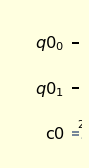

In [4]:
qreg = QuantumRegister(2)
registerBell = ClassicalRegister(2) 

qBell = QuantumCircuit(qreg,registerBell )

qBell.draw(output='mpl', style=style)

El estado inicial del circuito es: 

$$|\Psi_{0}> =  |0>_{0} |0>_{1} =|0>_{0} \otimes |0>_{1} $$ 

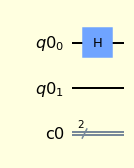

In [5]:
qBell.h(0)
qBell.draw(output='mpl', style=style)

$$H|0> = \frac{1}{\sqrt{2}} \Big(|0> + |1> \Big) \quad  H|1> = \frac{1}{\sqrt{2}} \Big(|0> - |1> \Big)  $$

La compuerta Hadamard es aplicada al qubit $|0>_{0}$

$$|\Psi_{1}> = (H \otimes I) |\Psi_{0}> =  H|0>_{0}I|0>_{1} = \Big[\frac{1}{\sqrt{2}} \Big(|0>_{0} +  |1>_{0} \Big) \Big] |0>_{1}  = \frac{1}{\sqrt{2}} \Big(|0>_{0}|0>_{1} +  |1>_{0}|0>_{1} \Big) $$ 

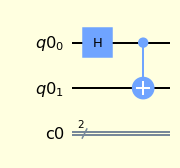

In [6]:
qBell.cx(0,1)
qBell.draw(output='mpl', style=style)

La compuerta CNOT es aplicada al estado $|\Psi_{1}>$

$$|\Psi_{2}> = CNOT_{01}|\Psi_{1}> =  \frac{1}{\sqrt{2}} \Big(CNOT_{01}|0>_{0}|0>_{1} +  CNOT_{01}|1>_{0}|0>_{1} \Big) = \frac{1}{\sqrt{2}} \Big(|0>_{0}|0>_{1} + |1>_{0}|1>_{1} \Big)  $$ 

El resultado es un estado entrelazado

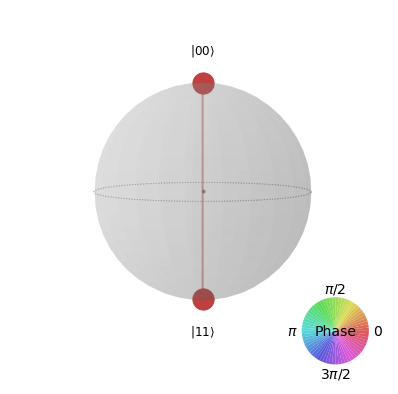

No measurements in circuit "circuit90", classical register will remain all zeros.


In [7]:
out_vectorBell = execute(qBell, backend_statevector).result().get_statevector()
plot_state_qsphere(out_vectorBell)

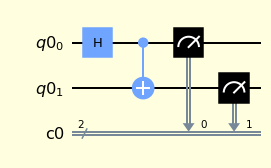

In [8]:
qBell.measure(qreg[0],registerBell[0])
qBell.measure(qreg[1],registerBell[1])
qBell.draw(output='mpl', style=style)

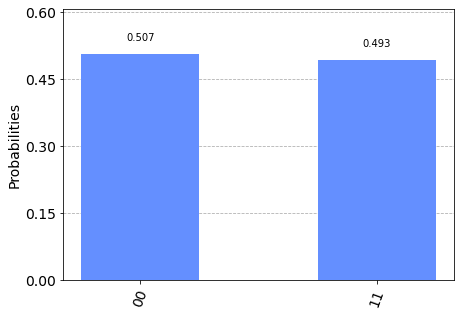

In [9]:
results = execute(qBell, backend=backend_qasm, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

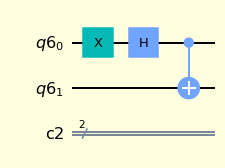

In [10]:
qregister = QuantumRegister(2)
cregisterBell = ClassicalRegister(2) 

qBell2 = QuantumCircuit(qregister,cregisterBell )

qBell2.x(0)
qBell2.h(0)
qBell2.cx(0,1)

qBell2.draw(output='mpl', style=style)


$$|\Psi_{0}> =  (X \otimes I)|0>_{0} |0>_{1} = X |0>_{0} I|0>_{1} = |1>_{0} \otimes |0>_{1} $$ 

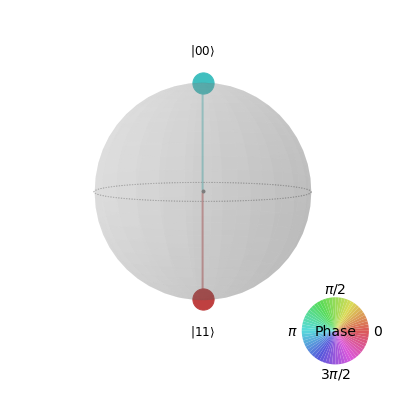

In [11]:
out_vectorBell2 = execute(qBell2, backend_statevector).result().get_statevector()
plot_state_qsphere(out_vectorBell2)

$$|\Psi> = \frac{1}{\sqrt{2}} \Big(|0>_{0}|0>_{1} - |1>_{0}|1>_{1} \Big)  $$ 


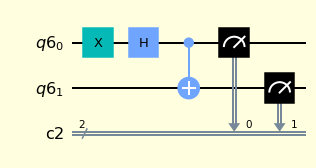

In [13]:
qBell2.measure(qregister[0],cregisterBell [0])
qBell2.measure(qregister[1],cregisterBell [1])
qBell2.draw(output='mpl', style=style)

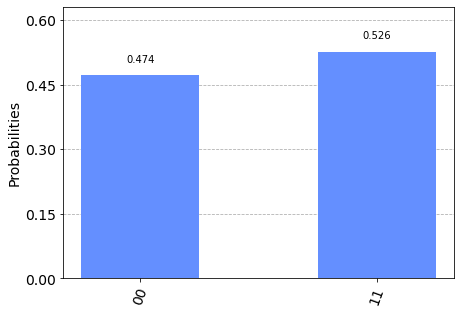

In [14]:
results2 = execute(qBell2, backend=backend_qasm, shots=shots).result()
answer2 = results2.get_counts()

plot_histogram(answer2)